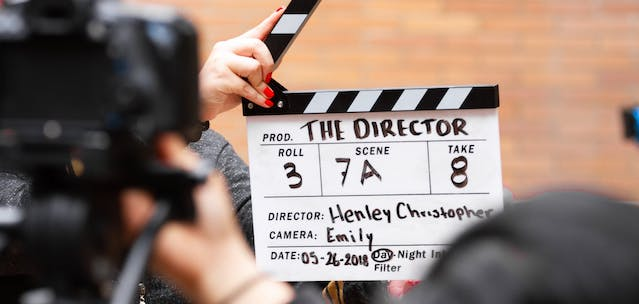

# Movie Industry Analysis for Microsoft

**Authors:** Aziza Gulyamova
***

## Overview

The purpose of this project is to help Microsoft better understand movie industry and figure out what kind of movies are doing the best currently in world. Using this analysis Microsoft can build up a strategy for creating their own movies that will definetly hit the top. 

Through this analysis, I will show some interesting trends in the data pertaining to what successful movies have in common. This analysis will mainly be done through the examination of provided datasets. 

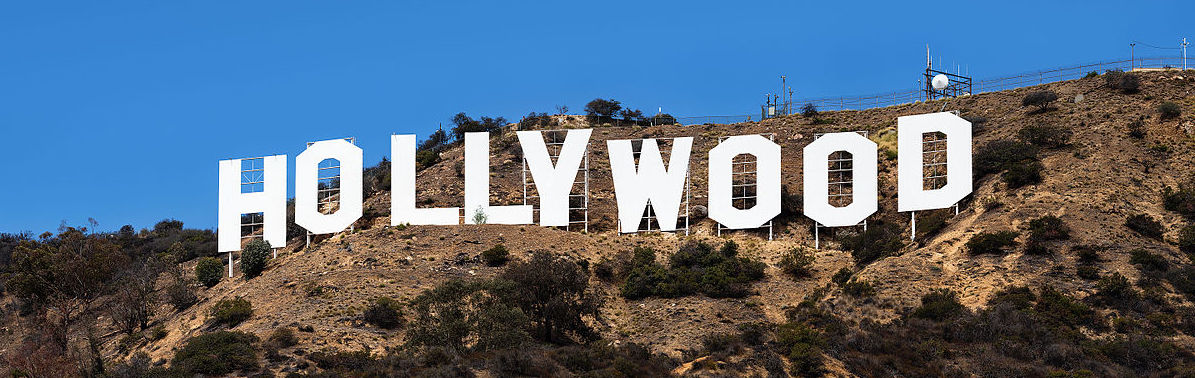

## Business Problem

In order to better understand the movie industry and find out what kind of movies Microsoft should produce to get the most of it, I analyzed the data sources and formulated 4 questions that Microsoft should consider before making the decision to enter movie industry and start filming:

* What genres are the most popular and giving the most profit?
* Is there a correlation between the average ratings and the runtime of the movie?
* Is there a correlation between movie's release date and gross profit?
* What are the Top 10 succesfull studios and what are their content ratings focus?

The questions will provide Microsoft valuable insight on which genres it should focus on to increase its likelihood of generating high gross sales. Does it need to consider the runtime of the movie when filming, what is the best time to release the movie for higher profit and what movie content it should focus on.

***

## Data Understanding

For this project, in order to analyze the world's movie industry, the Datasets are provided from different sources, such that: 

- IMDB 
- Box Office Mojo
- The Number movie Budgets
- Rotten Tomatoes

The datasets above contain various types of information about each movie, ranging from the release date, the director, the studio, to other information like the budget, the profit, the audience and critic scores from different sites.




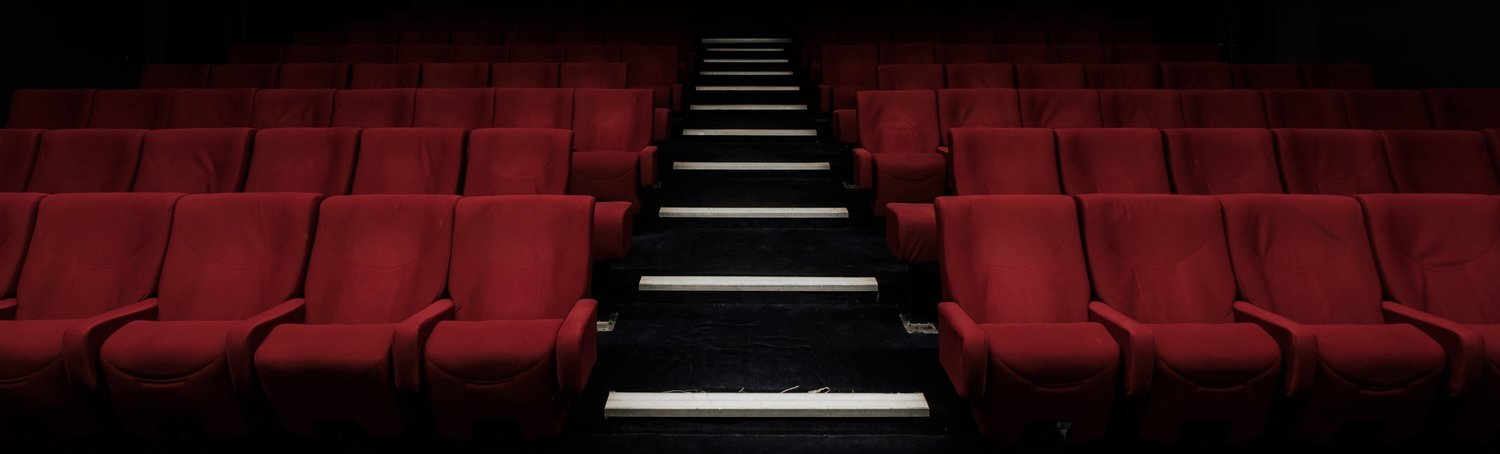

## Plan of Analysis

* Import Datasets
* Explore Data
* Data Preparation
  - Data Cleaning
  - Data Merging
  - Data Modeling
* Conclusions

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import additional files with statistical functions
import sys
import os

module_path = os.path.abspath(os.path.join('src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import stat_functions as stf

# Import Datasets

First, I upload the nesessary Datasets into following variables:
* basics: IMDB Title Basics
* ratings: IMDB Title Ratings
* gross: The Number movie budgets
* studios: Rotten Tomatoes Movies

In [2]:
basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
gross = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
studios = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')

# Explore Data

Now, explore the Data and check for following information: 

* What columns do we have in each of the datasets
* Are there any missing values in tables
* Are there duplicates in data

In [3]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
studios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [7]:
basics.duplicated().sum()

0

In [8]:
ratings.duplicated().sum()

0

In [9]:
gross.duplicated().sum()

0

# Data Preparation

To be able to get the most detailed analysis, I clean out the datasets from missing values, unnecessary columns and duplicates. Fill in the necessary values with appropriate values and merge some tables.



## Data Cleaning

### IMDB  Basics Dataset

From the exploration above, it is clear that "basics" dataset "genres" column is missing some values. In this case, it would be appropriate to drop those values from the table. In addition, dropping the unnecessary columns, such that "year" and "original title".

Also, the "runtime" column is missing some values which can be filled in with median runtime value.

In [10]:
basics.dropna(subset = ['genres'], inplace = True)
basics.drop(columns = ['start_year', 'original_title'], inplace = True)

basics.runtime_minutes.fillna(basics.runtime_minutes.median(), inplace = True)

###  IMDB Ratings Dataset

For this analysis, I am dropping the "numvotes" column from dataset as unnecessary.

In [11]:
ratings.drop(columns = ['numvotes'], inplace = True)

### The Number Movie Budgets Dataset

From this dataset, I will drop the "domestic_gross" column, as unnecessary. 

In [12]:
gross.drop(columns = [ 'domestic_gross'], inplace = True)

In [13]:
gross['release_date']= pd.to_datetime(gross['release_date'])

### Rotten Tomatoes Movies Dataset

Following dataset from Rotten Tomatoes contains a lot of information that is not my primary focus, thus I will be dropping the multiple columns

In [14]:
studios.drop(columns = ['rotten_tomatoes_link', 'movie_info', 'critics_consensus', 'original_release_date', 'tomatometer_status'], inplace = True)
studios.drop(columns = ['tomatometer_count', 'audience_status', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'], inplace = True)

## Data Merging

### Merging IMDB Basics and IMDB Ratings Datasets

Exploration shows that the length of "basics" dataset does not match the length of "ratings" table. In order to join two tables it would be appropriate to drop the missing rows and work on remaining part of the dataset.

First, set up index, by which I will join two tables:

In [15]:
basics.set_index('tconst', inplace = True)
ratings.set_index('tconst', inplace = True)

Merge two tables by matching index:

In [16]:
ratings_table = pd.merge(basics, ratings, left_index=True, right_index=True)
ratings_table.head(3)

,primary_title,runtime_minutes,genres,averagerating
tconst,,,,
tt0063540,Sunghursh,175.0,"Action,Crime,Drama",7.0
tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2
tt0069049,The Other Side of the Wind,122.0,Drama,6.9


Check if the new table has missing values:

In [17]:
ratings_table.isna().sum()

primary_title      0
runtime_minutes    0
genres             0
averagerating      0
dtype: int64

### Merging IMDB Basics and The Number Movie Budgets Datasets

The "gross" table has only about 6000 observations. In order to make the analysis more detailed, join to "gross" table the "basics" dataset by matching them on title. If there are still missing values, it would be suitable to drop them at a certain extend. 

First, set up the index by which tables will be joined:

In [18]:
basics.set_index('primary_title', inplace = True)
gross.set_index('movie', inplace = True)

Join two tables in "gross_table" variable and check the result:

In [19]:
gross_table = gross.join(basics)
gross_table.head(3)

,id,release_date,production_budget,worldwide_gross,runtime_minutes,genres
#Horror,16,2015-11-20,"$1,500,000",$0,101.0,"Crime,Drama,Horror"
(500) Days of Summer,55,2009-07-17,"$7,500,000","$34,439,060",NaN,NaN
10 Cloverfield Lane,54,2016-03-11,"$5,000,000","$108,286,422",103.0,"Drama,Horror,Mystery"


Check if the table still has missing values:

In [20]:
gross_table.isna().sum()

id                      0
release_date            0
production_budget       0
worldwide_gross         0
runtime_minutes      3419
genres               3419
dtype: int64

Clear the table by dropping rows with missing values:

In [21]:
gross_table.dropna(subset = ["genres"], inplace = True)

The "production_budget" and "worldwide_gross" columns are object type. In order to calculate the ROI, convert them into float type:

In [22]:
gross_table.production_budget = gross_table.production_budget.str.replace(',', '')
gross_table.production_budget = gross_table.production_budget.str.replace('$', '')
gross_table.production_budget = gross_table.production_budget.astype(float)

gross_table.worldwide_gross = gross_table.worldwide_gross.str.replace(',', '')
gross_table.worldwide_gross = gross_table.worldwide_gross.str.replace('$', '')
gross_table.worldwide_gross = gross_table.worldwide_gross.astype(float)

Reset index and display the table:

In [23]:
gross_table.reset_index(inplace = True)
gross_table.head(3)

,index,id,release_date,production_budget,worldwide_gross,runtime_minutes,genres
0,#Horror,16,2015-11-20,1500000.0,0.0,101.0,"Crime,Drama,Horror"
1,10 Cloverfield Lane,54,2016-03-11,5000000.0,108286422.0,103.0,"Drama,Horror,Mystery"
2,10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,111.0,Drama


## Data Modeling

### Calculate the ROI for top 30 genres

In order to figure out **what genres are the most popular and have the most profit**, first, I will calculate the ROI for each movie and stored in ROI column of the "gross_table" dataset:


In [24]:
gross_table['roi'] = gross_table['worldwide_gross'] - gross_table['production_budget']
gross_table.head(3)

,index,id,release_date,production_budget,worldwide_gross,runtime_minutes,genres,roi
0,#Horror,16,2015-11-20,1500000.0,0.0,101.0,"Crime,Drama,Horror",-1500000.0
1,10 Cloverfield Lane,54,2016-03-11,5000000.0,108286422.0,103.0,"Drama,Horror,Mystery",103286422.0
2,10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,111.0,Drama,-11985384.0


Check for missing values:

In [25]:
gross_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              3743 non-null   object        
 1   id                 3743 non-null   int64         
 2   release_date       3743 non-null   datetime64[ns]
 3   production_budget  3743 non-null   float64       
 4   worldwide_gross    3743 non-null   float64       
 5   runtime_minutes    3743 non-null   float64       
 6   genres             3743 non-null   object        
 7   roi                3743 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 234.1+ KB


Next, I will group table by genres and sort by ROI to find the genres that give most profit:

In [26]:
top_roi = gross_table.groupby("genres").sum().sort_values(by = ['roi'], ascending = False)
top_roi

,id,production_budget,worldwide_gross,runtime_minutes,roi
genres,,,,,
"Action,Adventure,Sci-Fi",2828,9.315400e+09,3.474955e+10,7358.0,2.543415e+10
"Adventure,Animation,Comedy",3312,7.139000e+09,2.748616e+10,6828.0,2.034716e+10
Drama,24450,9.963816e+09,2.128485e+10,47255.0,1.132103e+10
Documentary,13493,7.394092e+09,1.743006e+10,20208.0,1.003597e+10
"Action,Adventure,Fantasy",2121,5.210600e+09,1.402449e+10,4679.0,8.813891e+09
...,...,...,...,...,...
"Crime,Drama,History",94,9.200000e+07,2.782931e+07,379.0,-6.417069e+07
"Action,Family,Fantasy",79,9.000000e+07,2.046602e+07,110.0,-6.953398e+07
"Action,Crime,Fantasy",80,9.000000e+07,0.000000e+00,117.0,-9.000000e+07


To find the movie genres that are most produced and calculate average ROI for particular genre, I count the movies in each genre:

In [27]:
top_genres = gross_table.genres.value_counts()
top_genres

Drama                      497
Documentary                290
Comedy                     140
Comedy,Drama               104
Horror                      95
                          ... 
Fantasy,Romance              1
Action,Family,Fantasy        1
Action,Romance               1
Animation,Sci-Fi             1
Biography,Drama,Fantasy      1
Name: genres, Length: 345, dtype: int64

Next, I merge the information from above table with sorted ROI table:

In [28]:
top_genres_with_roi = pd.merge(top_roi, top_genres, left_index=True, right_index=True)
top_genres_with_roi = top_genres_with_roi.sort_values(by = ['genres'], ascending = False)

Calculate the average ROI for each genre and merge the resulted series into the table:

In [29]:
avg_roi = pd.Series(top_genres_with_roi['roi'] / top_genres_with_roi['genres'], name = 'avg_roi')
avg_roi

top_genres_with_avgroi = pd.merge(top_genres_with_roi, avg_roi, left_index=True, right_index=True)

Select only top 30 genres that were produced the most:

In [30]:
top_genres_with_avgroi = top_genres_with_avgroi.head(30)
top_genres_with_avgroi.head(3)

,id,production_budget,worldwide_gross,runtime_minutes,roi,genres,avg_roi
Drama,24450,9.963816e+09,2.128485e+10,47255.0,1.132103e+10,497,2.277874e+07
Documentary,13493,7.394092e+09,1.743006e+10,20208.0,1.003597e+10,290,3.460678e+07
Comedy,7054,3.647001e+09,7.823515e+09,13313.0,4.176513e+09,140,2.983224e+07


### Visualization of Top 30 Genres with Average ROI

Create a bar plot that contains **the top 30 genres and number of movies** for those movies and average **return on investment**. 

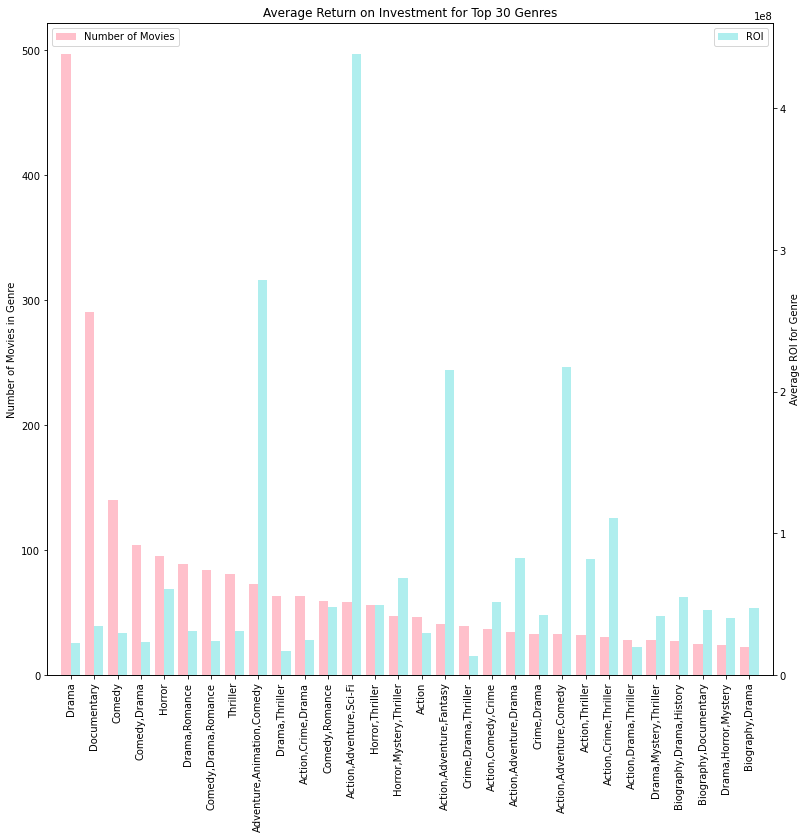

In [31]:
fig = plt.figure(figsize = (13, 12)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

top_genres_with_avgroi.genres.plot(kind = 'bar', color = 'pink', ax = ax, width = width, position = 1, label = 'Number of Movies')
top_genres_with_avgroi.avg_roi.plot(kind = 'bar', color = 'paleturquoise', ax = ax2, width = width, position = 0, label = 'ROI')

ax.set_ylabel('Number of Movies in Genre')
ax2.set_ylabel('Average ROI for Genre')
ax.set_title('Average Return on Investment for Top 30 Genres')

ax.legend(loc = 2)
ax2.legend (loc = 0)

plt.xlim(-1, 30)
plt.show() 

### Analysis of Top 30 Genres with Average ROI

The analysis shows that out of 30 Top genres **the most profitable ones** are "Adventure, Animation, Comedy", "Action, Adventure, Sci-Fi", "Action, Adventure, Fantasy" and "Action, Adventure, Comedy" genres.  But **the most produced genres** are "Drama", "Documentary" and "Comedy".


For Microsoft it would be the most profitable to start production in the "Adventure, Animation, Comedy", "Action, Adventure, Sci-Fi", "Action, Adventure, Fantasy" and "Action, Adventure, Comedy", because they have highest return on investment and not the most produced genres. As a result, Microsoft won't have a lot of competitors. 

### Check the Correlation Between Runtime of the Movie and Average Rating

Analysis of the correlation between runtime of the movie and average rating might help Microsoft to figure out what is **the most appropriate and comfortable runtime of the movie based on average rating**.

To calculate the correlation, we will be using the correlation function from the imported file:

In [32]:
stf.correlation(ratings_table.runtime_minutes,ratings_table.averagerating)

-0.01

### Analysis of Correlation Between Runtime of the Movie and Average Rating

From the calculation, it is obvious that **there is no correlation between Runtime and Average Rating of the movie**.

As a result, Microsoft can produce movies with any runtime length, not worring about the ratings. 

### Check the Relation Between Movie's Release Date and Gross Profit

In order to see in which month there is highest rate of movie releases, I need to first, change the data type of "release date" to datatime. Then, group the "gross_table" by 12 months

In [33]:
gross_table['month_of_release'] = gross_table['release_date'].dt.month
gross_table.head(3)

,index,id,release_date,production_budget,worldwide_gross,runtime_minutes,genres,roi,month_of_release
0,#Horror,16,2015-11-20,1500000.0,0.0,101.0,"Crime,Drama,Horror",-1500000.0,11
1,10 Cloverfield Lane,54,2016-03-11,5000000.0,108286422.0,103.0,"Drama,Horror,Mystery",103286422.0,3
2,10 Days in a Madhouse,48,2015-11-11,12000000.0,14616.0,111.0,Drama,-11985384.0,11


In [34]:
movies_permonth = gross_table['month_of_release'].value_counts()
movies_permonth.sort_index(ascending = True, inplace = True )

### Visualization of Number of Movies released by Months

To better comprehend and **analize in which seasons and months most of the movies are released**, I will plot a bar graph

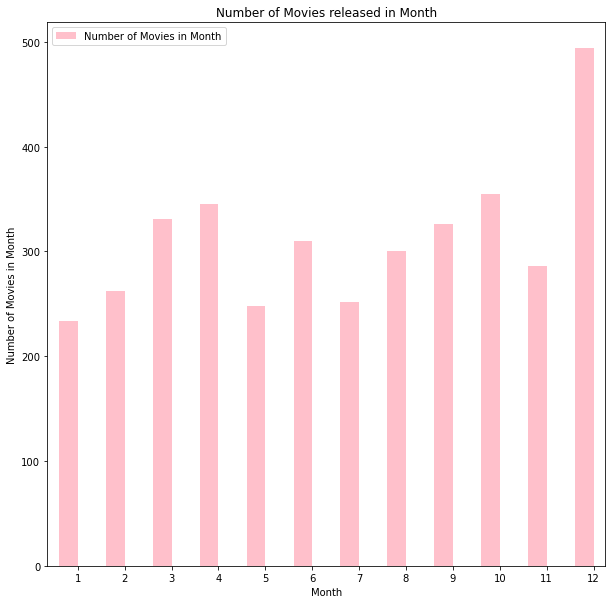

In [35]:
fig = plt.figure(figsize = (10, 10)) 
ax = fig.add_subplot(111)

width = 0.4

movies_permonth.plot(kind = 'bar', color = 'pink', ax = ax, width = width, position = 1, label = 'Number of Movies in Month')
ax.set_ylabel('Number of Movies in Month')
ax.set_xlabel('Month')
ax.set_title('Number of Movies released in Month')
ax.legend(loc = 2)
plt.xticks(rotation = 0)

plt.show() 

Now, I will group the "gross_table" by average profit per month and join to the table the "movies_permonth" values

In [36]:
profit_permonth = gross_table.groupby(["month_of_release"]).mean()
profit_permonth = profit_permonth.join(movies_permonth)

#Rename the joined column name to "num_of_movies"
profit_permonth.rename(columns = {'month_of_release':'num_of_movies'}, inplace = True)
profit_permonth

,id,production_budget,worldwide_gross,runtime_minutes,roi,num_of_movies
month_of_release,,,,,,
1,53.542735,2.254105e+07,6.057564e+07,97.367521,3.803459e+07,234
2,52.072519,2.942628e+07,8.163216e+07,95.011450,5.220587e+07,262
3,48.184290,4.546345e+07,1.306015e+08,92.583082,8.513804e+07,331
4,47.428986,2.623337e+07,7.121106e+07,93.478261,4.497769e+07,345
5,48.754032,4.610681e+07,1.351299e+08,99.149194,8.902312e+07,248
6,54.016129,4.432292e+07,1.463642e+08,93.887097,1.020412e+08,310
7,52.265873,3.891454e+07,1.286495e+08,97.912698,8.973499e+07,252
8,54.423333,2.397393e+07,5.750559e+07,94.083333,3.353166e+07,300
9,47.389571,2.385633e+07,4.734957e+07,95.889571,2.349323e+07,326


***
### Visualization of Correlation between Number of Movies Released and Average ROI

I create a plot with Number of Movies and Average ROI to see in which months the profits are the highest.

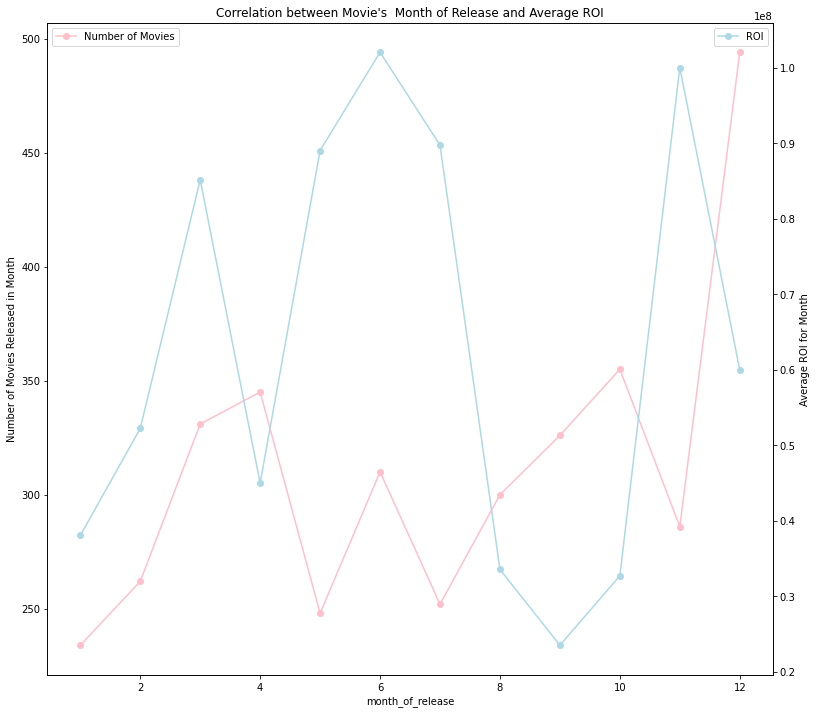

In [37]:
fig = plt.figure(figsize = (13, 12)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()

profit_permonth.num_of_movies.plot(marker = 'o', markevery = 1, color = 'pink', ax = ax, label = 'Number of Movies')
profit_permonth.roi.plot( marker = 'o', markevery = 1, color = 'lightblue', ax = ax2, label = 'ROI')

ax.set_ylabel('Number of Movies Released in Month')
ax2.set_ylabel('Average ROI for Month')
ax.set_title('Correlation between Movie\'s  Month of Release and Average ROI')

ax.legend(loc = 2)
ax2.legend (loc = 0)


plt.show()

### Analysis of the Correlation between Realease Month and Average ROI

The calculation and visualizations from above show that releasing movies during some of the months have very high profits. Those months are May, June, July, November. During this months tickets sales are high, where as in April, September, October and December are the least profitable times. Also, as the table shows from the above, in December the movie production companies release the highest amout of movies. 


As a result, Microsoft can plan the **releases of their movies in highly profitable months**, so the tickets sales would be on top too and **avoid releasing in low profit months**. Also, it would be highly recommended to not relase movies when the release amount is very high, because it will have high competition.

***

### Top 10 Studios which Produce the Highest amount of Movies

Select from Rotten Tomato Movies 10 studios that produced the largest amount of movies. 

In [38]:
top_studios = studios.production_company.value_counts().head(10)
top_studios

Paramount Pictures                  517
Warner Bros. Pictures               509
Universal Pictures                  495
20th Century Fox                    423
IFC Films                           413
Sony Pictures Home Entertainment    388
Warner Home Video                   369
Netflix                             357
MGM                                 279
Sony Pictures Classics              262
Name: production_company, dtype: int64

In [39]:
top_ten_studios = pd.DataFrame(data = top_studios)
top_ten_studios.rename(columns = {'production_company':'num_of_movies'}, inplace = True)

Retrieve all the data from "studios" dataset for the selected ten production companies and store that dataset under "studios_table" variable. 

In [40]:
studios_table = studios[studios['production_company'].isin(top_ten_studios.index)]
studios_table.head(3)

,movie_title,content_rating,genres,directors,authors,actors,streaming_release_date,runtime,production_company,tomatometer_rating,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2015-11-25,119.0,20th Century Fox,49.0,53.0,254421.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2012-09-04,90.0,Sony Pictures Classics,87.0,64.0,11574.0
5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2013-06-22,109.0,Warner Bros. Pictures,8.0,37.0,411140.0


Group the table by studios and content ratings, to count how many movies companies produce in this particular rating category.

In [41]:
studios_table = studios_table.groupby(['production_company', 'content_rating']).count()

Drop unnecessary columns that are irrelevant for the analysis.

In [42]:
studios_table.drop(inplace = True, columns = ['genres','directors','authors','actors','streaming_release_date','runtime','tomatometer_rating','audience_rating','audience_count'])
studios_table.reset_index(inplace = True)

***
### Visualization of Top 10 Studios with the content rating categories

I create the barplot which shows **the number of movies the 10 studios produce in particular content rating**, to see what are the most popular ones. 

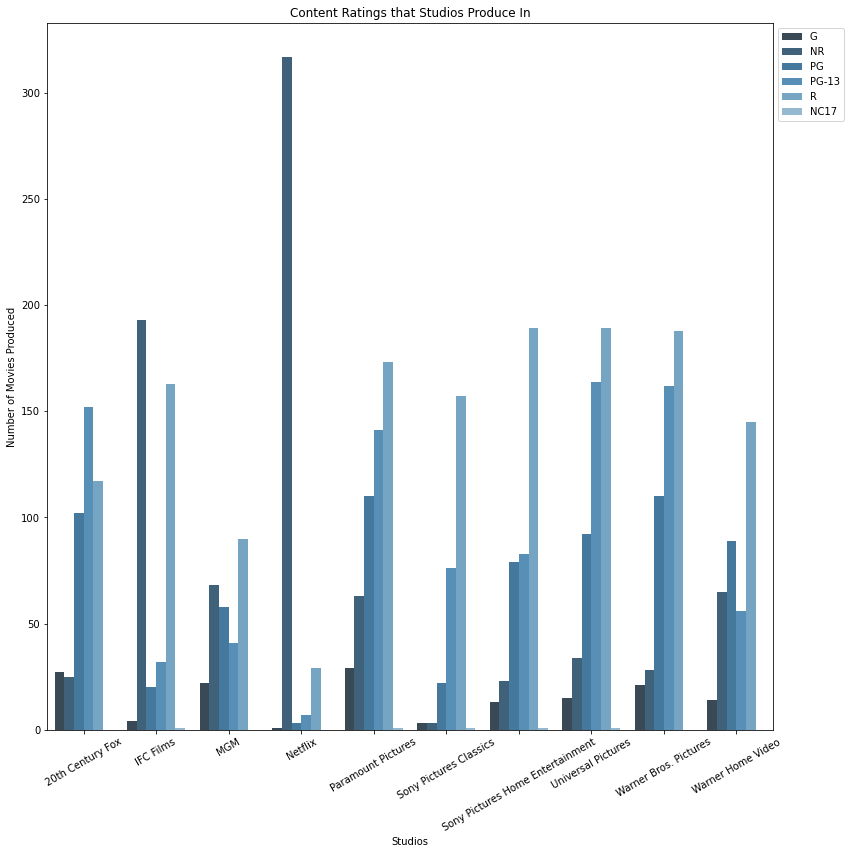

In [43]:
fig = plt.figure(figsize = (13, 13)) 

g = sns.barplot(data = studios_table, x = "production_company", y = "movie_title", hue = "content_rating", palette = "Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set(xlabel = "Studios", ylabel = "Number of Movies Produced",  )

plt.title("Content Ratings that Studios Produce In")
plt.legend(bbox_to_anchor = (1,1), loc = 2)

***
### Analysis of Top 10 Studios and Content Ratings

The table from above shows that **the most common content rating is "R" rating**, which is movies for audience older than 17. **The least produced ones are "G"- General Audience and "PG" - Parental Guidance Suggested**. 

Also, we see that most of the movies of "Netflix" company is not rated( "NR" - not rated). 

For Microsoft, this analysis would help to study the most successfull studios. Maybe it can produce movies in one niche that is not so produced, such that "G" and "PG". Or go with most common ones to be sure that they will hit some popularity, but have a high competition. 

***

## Conclusions
This analysis provides Microsoft with insight to movie industry on factors to consider to increase the chance of producing movies that will hit the top in cinematography. The following are the recommendations:

* **It would be the most profitable**  for Microsoft to make movies in "Adventure, Animation, Comedy", "Action, Adventure, Sci-Fi", "Action, Adventure, Fantasy" and "Action, Adventure, Comedy", because they have highest return on investment and not the most produced genres. Thus, increasing the chances to get interest of audience. 

* When producing movies, do not give extra attention to runtime, because the **ratings are not correlated with length of movie**. 

* **The most proftable months for movie release** are  May, June, July and November. Microsoft would hit highest ROI during these months. Also, it is recomended to avoid releaing in April, September, October and December, considering the fact that profits arew low during these times and December has the highest amount of releases. 

* **When choosing the content rating**, it would be suggested to choose the most popular one, such that "R". Because it would have high chances to get interest of audience. Or choose the least produced one as a niche, which might be less competative. 


***